In [ ]:
"""
Nome: Lucas Quaresma Medina Lam
NUSP: 11796399
"""

' \nNome: Lucas Quaresma Medina Lam\nNUSP: 11796399\n'

In [ ]:
""" Realiza imports """

import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_predict, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectFromModel
import numpy as np
from sklearn.inspection import permutation_importance

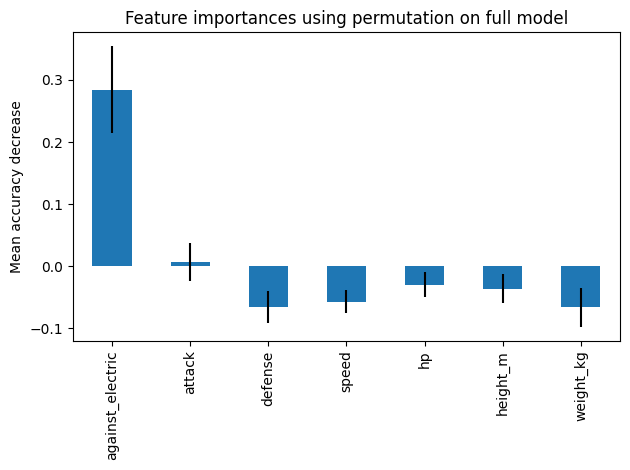

Index(['attack', 'against_electric'], dtype='object')


In [ ]:
""" Carrega dataset e trata os dados """

pokemon_data = pd.read_csv('pokemon.csv')

#Retira dados proibidos no enunciado
pokemon_data.drop(['type2', 'abilities'], axis=1, inplace=True)

#Separa e trata features para possível utilização na classificação
pokemon_data = pokemon_data[['type1', 'against_electric', 'attack', 'defense', 'speed', 'hp', 'height_m', 'weight_kg']]
pokemon_data['height_m'].fillna(pokemon_data['height_m'].mean(), inplace=True)
pokemon_data['weight_kg'].fillna(pokemon_data['weight_kg'].mean(), inplace=True)

# Filtra apenas pokémons do tipo aquático e normal
filtered_data = pokemon_data[(pokemon_data['type1'] == 'water') | (pokemon_data['type1'] == 'normal')]

X = filtered_data.drop('type1', axis=1)
y = filtered_data['type1']

# Divide os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Calcular a importância das características usando Random Forest
rf_model = RandomForestClassifier(random_state = 42)
rf_model.fit(X_train, y_train)

# Calcula a importância das características usando permutação
result = permutation_importance(rf_model, X_test, y_test, n_repeats=10, random_state=42, scoring='accuracy')
sorted_idx = result.importances_mean.argsort()

# Plota a importância das características
forest_importances = pd.Series(result.importances_mean, index=X_train.columns)
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

# Seleciona as características mais relevantes
selected_features = X_train.columns[sorted_idx][-2:]  # Seleciona as 2 características mais importantes
print(selected_features)

X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

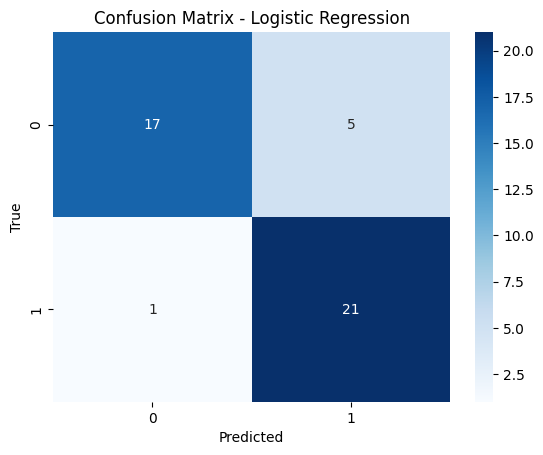

Classificador: Logistic Regression
Mean CV (treino):  0.7885620915032681
Acurácia (treino):  0.7885714285714286
Acurácia (teste):  0.8636363636363636



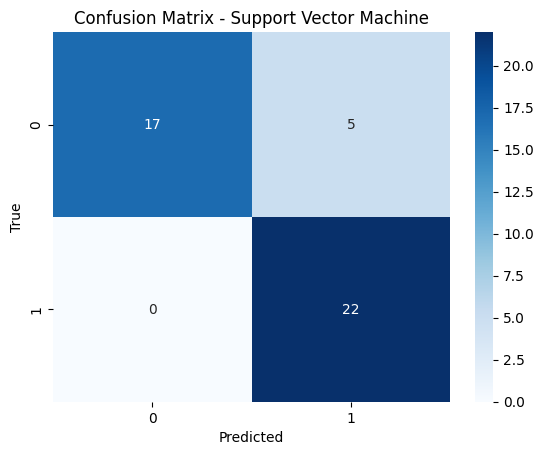

Classificador: Support Vector Machine
Mean CV (treino):  0.8274509803921569
Acurácia (treino):  0.8285714285714286
Acurácia (teste):  0.8863636363636364



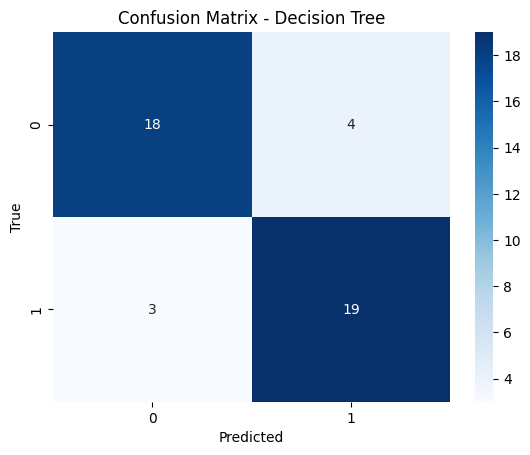

Classificador: Decision Tree
Mean CV (treino):  0.8107843137254902
Acurácia (treino):  0.88
Acurácia (teste):  0.8409090909090909



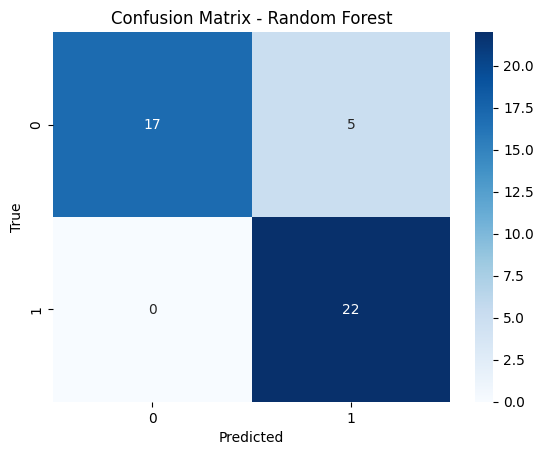

Classificador: Random Forest
Mean CV (treino):  0.8160130718954248
Acurácia (treino):  0.8285714285714286
Acurácia (teste):  0.8863636363636364



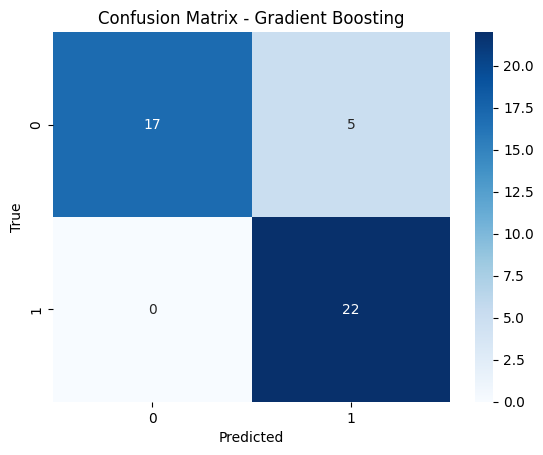

Classificador: Gradient Boosting
Mean CV (treino):  0.8215686274509805
Acurácia (treino):  0.8285714285714286
Acurácia (teste):  0.8863636363636364



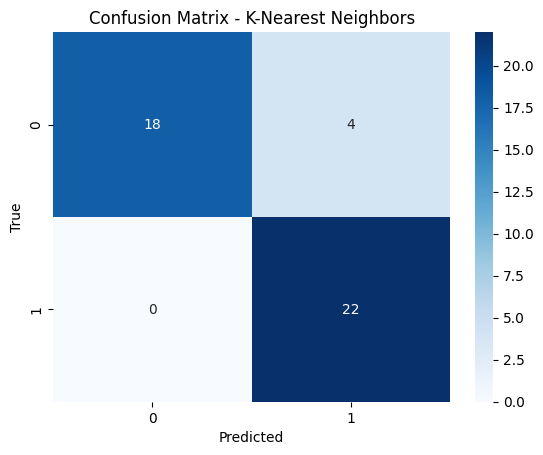

Classificador: K-Nearest Neighbors
Mean CV (treino):  0.8104575163398693
Acurácia (treino):  0.8457142857142858
Acurácia (teste):  0.9090909090909091



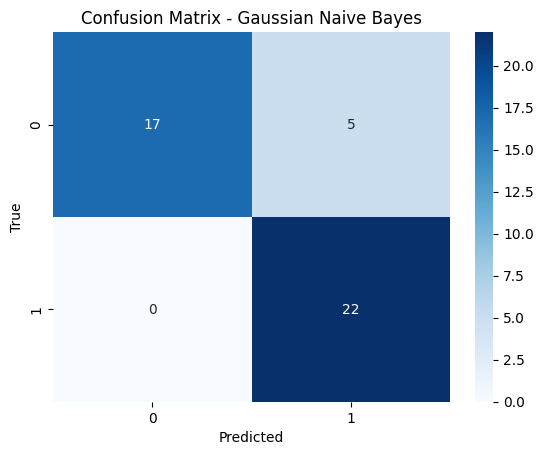

Classificador: Gaussian Naive Bayes
Mean CV (treino):  0.7937908496732027
Acurácia (treino):  0.8285714285714286
Acurácia (teste):  0.8863636363636364



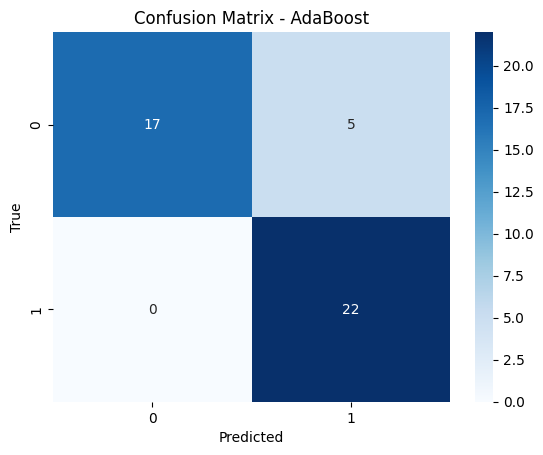

Classificador: AdaBoost
Mean CV (treino):  0.8160130718954248
Acurácia (treino):  0.8285714285714286
Acurácia (teste):  0.8863636363636364



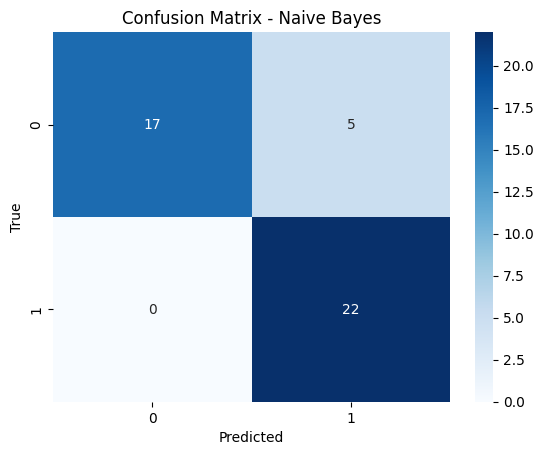

Classificador: Naive Bayes
Mean CV (treino):  0.7937908496732027
Acurácia (treino):  0.8285714285714286
Acurácia (teste):  0.8863636363636364



In [14]:
""" Define e treina os classificadores, e plota os seus respectivos gráficos """

classifiers = [
    ('Logistic Regression', LogisticRegression()),
    ('Support Vector Machine', SVC(probability=True)),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('Gradient Boosting', GradientBoostingClassifier()),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('Gaussian Naive Bayes', GaussianNB()),
    ('AdaBoost', AdaBoostClassifier()),
    ('Naive Bayes', GaussianNB())
]

for classifier_name, classifier in classifiers:
    # Cria um pipeline com pré-processamento (padronização) e o classificador
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', classifier)
    ])

    # Treina o classificador final com os melhores hiperparâmetros e características selecionadas
    param_grid = {}
    if classifier_name == 'Logistic Regression':
        param_grid = {'classifier__C': [0.1, 1, 10, 100]}
    elif classifier_name == 'Decision Tree':
        param_grid = {'classifier__max_depth': [None, 3, 5, 7, 10]}
    elif classifier_name == 'Random Forest':
        param_grid = {'classifier__n_estimators': [10, 50, 100], 'classifier__max_depth': [None, 3, 5, 7, 10]}
    elif classifier_name == 'Support Vector Machine':
        param_grid = {'classifier__C': [0.1, 1, 10, 100], 'classifier__gamma': [0.1, 1, 'scale', 'auto']}
    elif classifier_name == 'Gradient Boosting':
        param_grid = {'classifier__n_estimators': [50, 100, 200], 'classifier__learning_rate': [0.1, 0.01, 0.001]}
    elif classifier_name == 'K-Nearest Neighbors':
        param_grid = {'classifier__n_neighbors': [3, 5, 7]}
    elif classifier_name == 'AdaBoost':
        param_grid = {'classifier__n_estimators': [50, 100, 200], 'classifier__learning_rate': [0.1, 0.01, 0.001]}
    grid_search = GridSearchCV(pipeline, param_grid, cv=10, scoring='accuracy')

    grid_search.fit(X_train_selected, y_train)
    best_model = grid_search.best_estimator_

    # Faz previsões no conjunto de treinamento e teste
    y_train_pred = best_model.predict(X_train_selected)
    y_pred = best_model.predict(X_test_selected)

    # Calcula e plota a matriz de confusão
    cm = confusion_matrix(y_test, y_pred)
    plt.figure()
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix - {classifier_name}')
    plt.show()

    # Calcular a acurácia no conjunto de treinamento e teste
    accuracy_train = accuracy_score(y_train, y_train_pred)
    accuracy_test = accuracy_score(y_test, y_pred)

    #Calcula media CV
    best_result = grid_search.best_score_

    print(f"Classificador: {classifier_name}")
#    print("Melhores hiperparâmetros:", grid_search.best_params_)
    print("Mean CV (treino): ", best_result)
    print("Acurácia (treino): ", accuracy_train)
    print("Acurácia (teste): ", accuracy_test)
    print()